In [27]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
import seaborn as sns

In [30]:
train_path = "data/train.csv/train.csv"
test_path = "data/test.csv/test.csv"
test_labels_path = "data/test_labels.csv/test_labels.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
train.drop('id', inplace=True, axis=1) #dropping id column
test.head

<bound method NDFrame.head of                       id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]>

In [9]:


train.isnull().any(),test.isnull().any()



(comment_text     False
 toxic            False
 severe_toxic     False
 obscene          False
 threat           False
 insult           False
 identity_hate    False
 dtype: bool,
 id              False
 comment_text    False
 dtype: bool)

<AxesSubplot:>

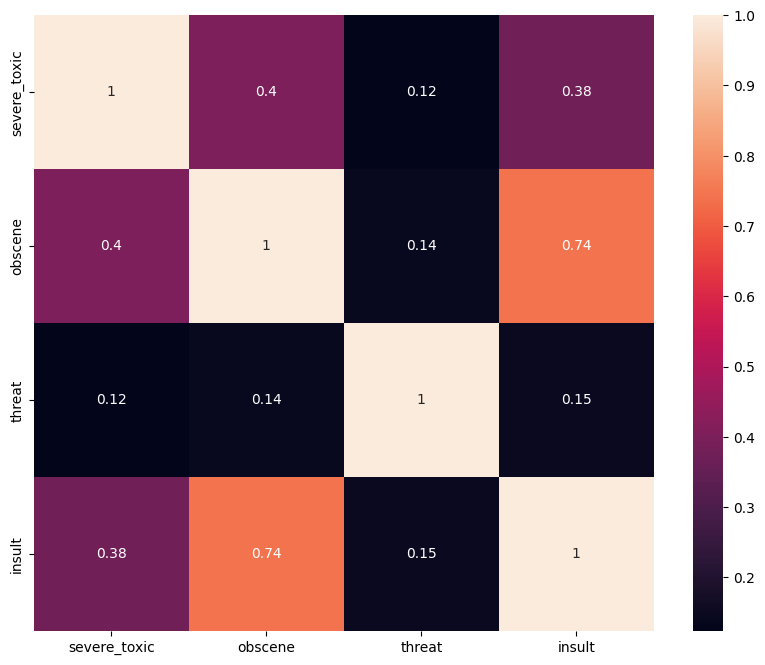

In [28]:
temp_df=train.iloc[:,2:-1]
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [31]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
ytrain = train[list_classes].values
Xtrain = train["comment_text"]
Xtest = test["comment_text"]

add preprocessing here

In [12]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(Xtrain))
X_tokenized_train = tokenizer.texts_to_sequences(Xtrain)
X_tokenized_test = tokenizer.texts_to_sequences(Xtest)

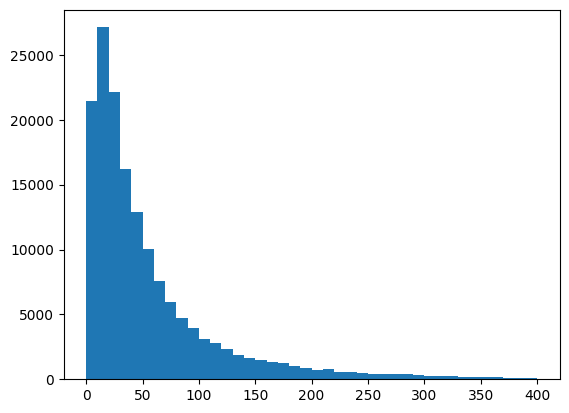

In [14]:
totalNumWords = [len(one_comment) for one_comment in X_tokenized_train]
plt.hist(totalNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.show()

In [16]:
maxlen = 200
X_t = pad_sequences(X_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(X_tokenized_test, maxlen=maxlen)

In [22]:
inp = Input(shape=(maxlen, ))
embed_size = 128
x = Embedding(max_features, embed_size)(inp)
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
print(model.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 lstm_layer (LSTM)           (None, 200, 60)           45360     
                                                                 
 global_max_pooling1d_5 (Glo  (None, 60)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_10 (Dropout)        (None, 60)                0         
                                                                 
 dense_10 (Dense)            (None, 50)                3050      
                                                           

In [24]:
batch_size = 32
epochs = 2
model.fit(X_t,ytrain, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
4488/4488 [==============================] - 844s 188ms/step - loss: 0.0662 - accuracy: 0.9447 - val_loss: 0.0495 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 815s 182ms/step - loss: 0.0444 - accuracy: 0.9763 - val_loss: 0.0469 - val_accuracy: 0.9938
